In [ ]:
#default_exp datasets

# Datasets

> helper functions for loading timeseries datasets

### UCR

In [ ]:
#export
from torchtools.data import *

In [ ]:
#export
import numpy as np
#import torch
from fastai2.torch_basics import *
from fastai2.data.all import *
from fastai2.callback.all import *

All of the UCR functions are ported from https://github.com/timeseriesAI/timeseriesAI to work with fastai2.

In [ ]:
#export
import os
import tempfile
try: from urllib import urlretrieve
except ImportError: from urllib.request import urlretrieve
import shutil
from pyunpack import Archive
from scipy.io import arff

In [ ]:
#export
#TSUtilities
def To3dArray(arr):
    arr = ToArray(arr)
    if arr.ndim == 1: arr = arr[None, None]
    elif arr.ndim == 2: arr = arr[:, None]
    elif arr.ndim == 4: arr = arr[0]
    assert arr.ndim == 3, 'Please, review input dimensions'
    return np.array(arr)

def ToArray(arr):
    if isinstance(arr, torch.Tensor):
        arr = np.array(arr)
    elif not isinstance(arr, np.ndarray):
        print(f"Can't convert {type(arr)} to np.array")
    if arr.dtype == 'O': arr = np.array(arr, dtype=np.float32)
    return arr


In [ ]:
#export
def decompress_from_url(url, target_dir=None, verbose=False):
    """Downloads a compressed file from its URL and uncompresses it.

    Parameters
    ----------
    url : string
        URL from which to download.
    target_dir : str or None (default: None)
        Directory to be used to extract downloaded files.
    verbose : bool (default: False)
        Whether to print information about the process (cached files used, ...)

    Returns
    -------
    str or None
        Directory in which the compressed file has been extracted if the process was
        successful, None otherwise
    """
    try:
        fname = os.path.basename(url)
        tmpdir = tempfile.mkdtemp()
        local_comp_fname = os.path.join(tmpdir, fname)
        urlretrieve(url, local_comp_fname)
    except:
        shutil.rmtree(tmpdir)
        if verbose:
            sys.stderr.write("Could not download url. Please, check url.\n")
    try:
        if not os.path.exists(target_dir): os.makedirs(target_dir)
        Archive(local_comp_fname).extractall(target_dir)
        shutil.rmtree(tmpdir)
        if verbose:
            print("Successfully extracted file %s to path %s" %
                  (local_comp_fname, target_dir))
        return target_dir
    except:
        shutil.rmtree(tmpdir)
        if verbose:
            sys.stderr.write("Could not uncompress file, aborting.\n")
        return None



def get_UCR_univariate_list():
    return sorted([
        'ACSF1', 'Adiac', 'AllGestureWiimoteX', 'AllGestureWiimoteY',
        'AllGestureWiimoteZ', 'ArrowHead', 'AsphaltObstacles', 'BME', 'Beef',
        'BeetleFly', 'BirdChicken', 'CBF', 'Car', 'Chinatown',
        'ChlorineConcentration', 'CinCECGTorso', 'Coffee', 'Computers',
        'CricketX', 'CricketY', 'CricketZ', 'Crop', 'DiatomSizeReduction',
        'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxOutlineCorrect',
        'DistalPhalanxTW', 'DodgerLoopDay', 'DodgerLoopGame',
        'DodgerLoopWeekend', 'ECG200', 'ECG5000', 'ECGFiveDays',
        'EOGHorizontalSignal', 'EOGVerticalSignal', 'Earthquakes',
        'ElectricDevices', 'EthanolLevel', 'FaceAll', 'FaceFour', 'FacesUCR',
        'FiftyWords', 'Fish', 'FordA', 'FordB', 'FreezerRegularTrain',
        'FreezerSmallTrain', 'Fungi', 'GestureMidAirD1', 'GestureMidAirD2',
        'GestureMidAirD3', 'GesturePebbleZ1', 'GesturePebbleZ2', 'GunPoint',
        'GunPointAgeSpan', 'GunPointMaleVersusFemale',
        'GunPointOldVersusYoung', 'Ham', 'HandOutlines', 'Haptics', 'Herring',
        'HouseTwenty', 'InlineSkate', 'InsectEPGRegularTrain',
        'InsectEPGSmallTrain', 'InsectWingbeatSound', 'ItalyPowerDemand',
        'LargeKitchenAppliances', 'Lightning2', 'Lightning7', 'Mallat', 'Meat',
        'MedicalImages', 'MelbournePedestrian', 'MiddlePhalanxOutlineAgeGroup',
        'MiddlePhalanxOutlineCorrect', 'MiddlePhalanxTW',
        'MixedShapesRegularTrain', 'MixedShapesSmallTrain', 'MoteStrain',
        'NonInvasiveFetalECGThorax1', 'NonInvasiveFetalECGThorax2', 'OSULeaf',
        'OliveOil', 'PLAID', 'PhalangesOutlinesCorrect', 'Phoneme',
        'PickupGestureWiimoteZ', 'PigAirwayPressure', 'PigArtPressure',
        'PigCVP', 'Plane', 'PowerCons', 'ProximalPhalanxOutlineAgeGroup',
        'ProximalPhalanxOutlineCorrect', 'ProximalPhalanxTW',
        'RefrigerationDevices', 'Rock', 'ScreenType', 'SemgHandGenderCh2',
        'SemgHandMovementCh2', 'SemgHandSubjectCh2', 'ShakeGestureWiimoteZ',
        'ShapeletSim', 'ShapesAll', 'SmallKitchenAppliances', 'SmoothSubspace',
        'SonyAIBORobotSurface1', 'SonyAIBORobotSurface2', 'StarLightCurves',
        'Strawberry', 'SwedishLeaf', 'Symbols', 'SyntheticControl',
        'ToeSegmentation1', 'ToeSegmentation2', 'Trace', 'TwoLeadECG',
        'TwoPatterns', 'UMD', 'UWaveGestureLibraryAll', 'UWaveGestureLibraryX',
        'UWaveGestureLibraryY', 'UWaveGestureLibraryZ', 'Wafer', 'Wine',
        'WordSynonyms', 'Worms', 'WormsTwoClass', 'Yoga'
    ])


def get_UCR_multivariate_list():
    return sorted([
        'ArticularyWordRecognition', 'AtrialFibrillation', 'BasicMotions',
        'CharacterTrajectories', 'Cricket', 'DuckDuckGeese', 'ERing',
        'EigenWorms', 'Epilepsy', 'EthanolConcentration', 'FaceDetection',
        'FingerMovements', 'HandMovementDirection', 'Handwriting', 'Heartbeat',
        'InsectWingbeat', 'JapaneseVowels', 'LSST', 'Libras', 'MotorImagery',
        'NATOPS', 'PEMS-SF', 'PenDigits', 'PhonemeSpectra', 'RacketSports',
        'SelfRegulationSCP1', 'SelfRegulationSCP2', 'SpokenArabicDigits',
        'StandWalkJump', 'UWaveGestureLibrary'
    ])


In [ ]:
#export
def get_UCR_univariate(sel_dataset, parent_dir='data/UCR', verbose=False, drop_na=False, check=True):
    if check and sel_dataset not in get_UCR_univariate_list():
        print('This dataset does not exist. Please select one from this list:')
        print(get_UCR_univariate_list())
        return None, None, None, None
    if verbose: print('Dataset:', sel_dataset)
    src_website = 'http://www.timeseriesclassification.com/Downloads/'
    tgt_dir = Path(parent_dir) / sel_dataset
    if verbose: print('Downloading and decompressing data...')
    if not os.path.isdir(tgt_dir):
        decompress_from_url(
            src_website + sel_dataset + '.zip', target_dir=tgt_dir, verbose=verbose)
    if verbose: print('...data downloaded and decompressed')
    fname_train = sel_dataset + "_TRAIN.arff"
    fname_test = sel_dataset + "_TEST.arff"

    train_df = pd.DataFrame(arff.loadarff(os.path.join(tgt_dir, fname_train))[0])
    test_df = pd.DataFrame(arff.loadarff(os.path.join(tgt_dir, fname_test))[0])
    unique_cats = train_df.iloc[:, -1].unique()
    mapping = dict(zip(unique_cats, np.arange(len(unique_cats))))
    train_df = train_df.replace({train_df.columns.values[-1]: mapping})
    test_df = test_df.replace({test_df.columns.values[-1]: mapping})
    if drop_na:
        train_df.dropna(axis=1, inplace=True)
        test_df.dropna(axis=1, inplace=True)

    X_train = train_df.iloc[:, :-1].values.astype(np.float32)
    X_test = test_df.iloc[:, :-1].values.astype(np.float32)
    y_train = train_df.iloc[:, -1].values.astype(int)
    y_test = test_df.iloc[:, -1].values.astype(int)

    X_train = To3dArray(X_train)
    X_test = To3dArray(X_test)

    if verbose:
        print('Successfully extracted dataset\n')
        print('X_train:', X_train.shape)
        print('y_train:', y_train.shape)
        print('X_valid:', X_test.shape)
        print('y_valid:', y_test.shape, '\n')
    return X_train, y_train, X_test, y_test



def get_UCR_multivariate(sel_dataset, parent_dir='data/UCR', verbose=False, check=True):
    if sel_dataset.lower() == 'mphoneme': sel_dataset = 'Phoneme'
    if check and sel_dataset not in get_UCR_multivariate_list():
        print('This dataset does not exist. Please select one from this list:')
        print(get_UCR_multivariate_list())
        return None, None, None, None
    if verbose: print('Dataset:', sel_dataset)
    src_website = 'http://www.timeseriesclassification.com/Downloads/'
    tgt_dir = Path(parent_dir) / sel_dataset

    if verbose: print('Downloading and decompressing data...')
    if not os.path.isdir(tgt_dir):
        decompress_from_url(
            src_website + sel_dataset + '.zip', target_dir=tgt_dir, verbose=verbose)
    if verbose: print('...data downloaded and decompressed')
    if verbose: print('Extracting data...')
    X_train_ = []
    X_test_ = []
    for i in range(10000):
        if not os.path.isfile(
                f'{parent_dir}/{sel_dataset}/{sel_dataset}Dimension'
                + str(i + 1) + '_TRAIN.arff'):
            break
        train_df = pd.DataFrame(
            arff.loadarff(
                f'{parent_dir}/{sel_dataset}/{sel_dataset}Dimension'
                + str(i + 1) + '_TRAIN.arff')[0])
        unique_cats = train_df.iloc[:, -1].unique()
        mapping = dict(zip(unique_cats, np.arange(len(unique_cats))))
        train_df = train_df.replace({train_df.columns.values[-1]: mapping})
        test_df = pd.DataFrame(
            arff.loadarff(
                f'{parent_dir}/{sel_dataset}/{sel_dataset}Dimension'
                + str(i + 1) + '_TEST.arff')[0])
        test_df = test_df.replace({test_df.columns.values[-1]: mapping})
        X_train_.append(train_df.iloc[:, :-1].values)
        X_test_.append(test_df.iloc[:, :-1].values)

    if verbose: print('...extraction complete')
    X_train = np.stack(X_train_, axis=-1)
    X_test = np.stack(X_test_, axis=-1)

    # In this case we need to rearrange the arrays ()
    X_train = np.transpose(X_train, (0, 2, 1))
    X_test = np.transpose(X_test, (0, 2, 1))

    y_train = np.array([int(float(x)) for x in train_df.iloc[:, -1]])
    y_test = np.array([int(float(x)) for x in test_df.iloc[:, -1]])

    if verbose:
        print('Successfully extracted dataset\n')
        print('X_train:', X_train.shape)
        print('y_train:', y_train.shape)
        print('X_valid:', X_test.shape)
        print('y_valid:', y_test.shape, '\n')
    return X_train, y_train, X_test, y_test


def get_UCR_data(dsid, parent_dir='data/UCR', verbose=False, check=True):
    if dsid in get_UCR_univariate_list():
        return get_UCR_univariate(dsid, verbose=verbose, check=check)
    elif dsid in get_UCR_multivariate_list():
        return get_UCR_multivariate(dsid, verbose=verbose, check=check)
    else:
        print(f'This {dsid} dataset does not exist. Please select one from these lists:')
        print('\nunivariate datasets')
        print(get_UCR_univariate_list())
        print('\nmultivariate datasets')
        print(get_UCR_multivariate_list(), '\n')
        return None, None, None, None


In [ ]:
datasets_uni = get_UCR_univariate_list()
datasets_multi = get_UCR_multivariate_list()

datasets_uni[-5:], datasets_multi[-5:]

(['Wine', 'WordSynonyms', 'Worms', 'WormsTwoClass', 'Yoga'],
 ['SelfRegulationSCP1',
  'SelfRegulationSCP2',
  'SpokenArabicDigits',
  'StandWalkJump',
  'UWaveGestureLibrary'])

In [ ]:
dset = get_UCR_multivariate('UWaveGestureLibrary')
dset[3].shape

(320,)

yscale
ynormal
ynormal
yscale


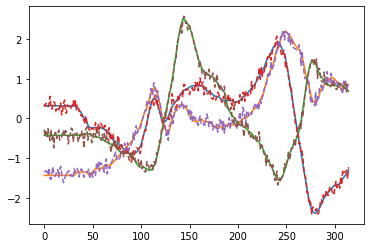

In [ ]:
from torchtools.augmentations import RandAugment
raug = RandAugment(magnitude=0.1)
raug(TSTensor(torch.rand(1,10)))
plt.plot(dset[0][0].T, label='orig')
plt.plot(raug(TSTensor(dset[0][0])).T, linestyle='dashed',label='randaug');

In [ ]:
#export
def ucr_to_items(dset):
    '''
    create items for DataBlock from a UCR dset
    '''
    x_train, y_train, x_test, y_test = dset
    n_train = x_train.shape[0]
    return list(zip(np.concatenate([x_train, x_test]), np.concatenate([y_train, y_test]))), n_train

In [ ]:
items, n_train = ucr_to_items(dset)

items[0][0].shape, items[0][1]

((3, 315), 0)

UCR workflow
```
dset = get_UCR_multivariate(univariate)(name)
items, n_train = ucr_to_items(dset)
```

### Dataframe

In [ ]:
df_main = pd.read_csv('./data/custom/bi_sample_anon.csv', nrows=100000)

df_main.shape

(100000, 66)

We do a manual preprocessing first

- fill missing
- calculate normalization stats (also do normalization)
- transform columns values to tensors

Doing these transformations lazily is very slow, e.g. getting the columns values from the dataframe
Can this be integrated into DataBlock? E.g. in the get_items method? get_items is not a Transform, so this is not reversible for e.g. data inspection...

In [ ]:
## simple config
x_cols = [[f'x{i}_{j}' for j in range(10)] for i in range(6)]
dep = 'y0'
n_train = 8000

In [ ]:
def get_simple_config(discrete=False):
    '''get a simple column configuration for development'''
    if not discrete:
        x_cols = [[f'x{i}_{j}' for j in range(10)] for i in range(6)]
    else:
        x_cols_cont = [[f'x{i}_{j}' for j in range(10)] for i in [0,1,3,4]] 
        x_cols_discrete = [[f'x{i}_{j}' for j in range(10)] for i in [2,5]]
        x_cols = x_cols_cont, x_cols_discrete
    dep = 'y0'
    n_train = 8000
    
    return x_cols, dep, n_train

In [ ]:
x_cols, dep, n_train = get_simple_config(discrete=True)

In [ ]:
x_dis = _get_x(df_main, x_cols[1], dtype=int)

In [ ]:
x_dis

array([[[ 0,  1, -1, ...,  0, -2,  1],
        [ 0,  1,  0, ...,  0, -1, -2]],

       [[ 0, -1,  0, ...,  0,  1,  2],
        [ 0, -1,  1, ...,  0,  2, -1]],

       [[-1,  0,  0, ...,  1, -2,  0],
        [ 2,  1, -2, ...,  2,  1,  0]],

       ...,

       [[ 2,  1, -1, ...,  3,  0, -5],
        [-2, -3,  1, ..., -4,  0, -3]],

       [[ 2, -2,  2, ..., -5,  0, -1],
        [ 1,  0,  2, ..., -4,  1,  2]],

       [[-1,  0, -2, ...,  4, -1, -2],
        [-2,  2, -2, ...,  5,  0,  1]]])

In [ ]:
#export
def _get_x(df, x_cols, dtype=np.float32):
    return np.stack([df[x_cols[i]].values for i in range(len(x_cols))], axis=1).astype(dtype)
def _get_y(df, dep):
    return df[dep].values

In [ ]:
if not isinstance(x_cols, tuple):
    x,y = _get_x(df_main, x_cols), _get_y(df_main, dep)
else:
    x_cont, x_dis, y = _get_x(df_main, x_cols[0]), _get_x(df_main, x_cols[1], dtype=int), _get_y(df_main, dep)

In [ ]:
x_dis

array([[[ 0,  1, -1, ...,  0, -2,  1],
        [ 0,  1,  0, ...,  0, -1, -2]],

       [[ 0, -1,  0, ...,  0,  1,  2],
        [ 0, -1,  1, ...,  0,  2, -1]],

       [[-1,  0,  0, ...,  1, -2,  0],
        [ 2,  1, -2, ...,  2,  1,  0]],

       ...,

       [[ 2,  1, -1, ...,  3,  0, -5],
        [-2, -3,  1, ..., -4,  0, -3]],

       [[ 2, -2,  2, ..., -5,  0, -1],
        [ 1,  0,  2, ..., -4,  1,  2]],

       [[-1,  0, -2, ...,  4, -1, -2],
        [-2,  2, -2, ...,  5,  0,  1]]])

In [ ]:
x_cont.astype(np.float32).dtype

dtype('float32')

In [ ]:
#export
## not for discrete columns
def _calc_stats(x, n_train, axis=(0,2)):
    return np.nanmean(x[:n_train], axis=axis), np.nanstd(x[:n_train], axis=axis),np.nanmedian(x[:n_train], axis=axis)
    

In [ ]:
means,stds,medians =  _calc_stats(x, n_train)
# means,stds,medians =  _calc_stats(x_cont, n_train)

In [ ]:
means

array([-1.2868776 , -0.7260259 ,  0.01021978, -1.7377727 , -1.0197207 ,
       -0.01062794], dtype=float32)

In [ ]:
#export
def _fillna(x, values):
    if np.ndim(values)==0: np.nan_to_num(x, copy=False, nan=0)
        
    else:
        assert x.shape[-2]==values.shape[0]
        for i,v in enumerate(values): np.nan_to_num(x[:,i,:], copy=False, nan=v)

In [ ]:
#export
def _normalize(x, means, stds):
    assert x.shape[-2]==means.shape[0]
    for i,v in enumerate(means): x[:,i,:]

In [ ]:
_fillna(x, means)
assert not np.isnan(x).any() 

In [ ]:
#export
def df_to_items(df, x_cols, dep, n_train):
    x,y = _get_x(df, x_cols), _get_y(df, dep)    
    print(x.shape)
    means,stds,medians =  _calc_stats(x, n_train)
    _fillna(x, means)
    assert not np.isnan(x).any() 
    return list(zip(x,y)), n_train

In [ ]:
#export
def df_to_items_discrete(df, x_cols, dep, n_train):
    x_cont, x_dis, y = _get_x(df, x_cols[0]), _get_x(df, x_cols[1], dtype=int), _get_y(df, dep)    
    print(x_cont.shape, x_dis.shape)
    means,stds,medians =  _calc_stats(x_cont, n_train)
    _fillna(x_cont, means)
    _fillna(x_dis, 0)
    
    assert not np.isnan(x_cont).any() 
    assert not np.isnan(x_dis).any() 
    
    return list(zip(x_cont, x_dis, y)), n_train

In [ ]:
items, n_train = df_to_items(df_main, x_cols, dep, 8000)

NameError: name 'df_to_items' is not defined

In [ ]:
items, n_train = df_to_items_discrete(df_main, x_cols, dep, 8000)

(100000, 4, 10) (100000, 2, 10)
float32
int64


In [ ]:
items[0]

(array([[  -7.8431373,  100.       ,   -6.497726 ,  -24.509804 ,
          -33.22259  ,  -42.735043 ,  -55.24862  ,  -56.497173 ,
          -30.674847 ,  100.       ],
        [ 100.       ,    0.       ,    0.       ,    0.       ,
            0.       ,    0.       ,    0.       ,    0.       ,
            0.       ,    0.       ],
        [ -17.301039 ,  100.       ,  -30.674847 ,  -54.945053 ,
         -227.27272  ,  -27.855154 , -400.       , -147.05882  ,
         -100.       ,  -94.33962  ],
        [   0.       ,    0.       ,    0.       ,    0.       ,
            0.       ,    0.       ,    0.       ,    0.       ,
            0.       ,    0.       ]], dtype=float32),
 array([[ 0,  1, -1, -2, -1,  0,  0,  0, -2,  1],
        [ 0,  1,  0, -1, -1, -1, -1,  0, -1, -2]]),
 -56.49717514124313)

numpy.ndarray

In [ ]:
items[0][0].shape, items[0][1]

((6, 10), -56.49717514124313)

Dataframe workflow:

```
items, n_train = df_to_items(df, x_cols, dep, n_train)
```

In [ ]:
items[0][1]

-56.49717514124313

### Experimental

In [ ]:
class EagerTransform(Transform):
    '''apply immediately'''
    def setup(self, items, train_setup=False):
        super().setup(items, train_setup=False)
        return self(items.items)

In [ ]:
class GetX(EagerTransform):
    def encodes(self, df):
        return df[x_cols[0]].values

In [ ]:
class GetX(Transform):
    def encodes(self, df):
        return df[x_cols[0]].values

In [ ]:
class GetY(EagerTransform):
    def encodes(self, df):
        print('get_y')
        return df[dep]

In [ ]:
class GetY(Transform):
    def encodes(self, df):
        print('get_y')        
        return df[dep]

In [ ]:
dblock = DataBlock(splitter=RandomSplitter(), get_x=GetX, get_y=GetY)

In [ ]:
#export
def df_get_items(df, x_cols, dep, n_train):
    x,y = _get_x(df, x_cols), _get_y(df, dep)    
    print(x.shape)
    means,stds,medians =  _calc_stats(x, n_train)
    _fillna(x, means)
    assert not np.isnan(x).any() 
    return list(zip(x,y))    

In [ ]:
get_items = partial(df_get_items,x_cols=x_cols, dep=dep, n_train=8000)

In [ ]:
get_x = lambda x:TSTensor(torch.tensor(x[0]).float())
get_y = lambda x: x[1]

In [ ]:
val_idx=list(range(80000,100000))
splitter = IndexSplitter(val_idx)

In [ ]:
dblock = DataBlock(splitter=splitter, get_items=get_items, get_x=get_x, get_y=get_y,
                  batch_tfms=RandAugment(2))

In [ ]:
dsets = dblock.datasets(df_main)

(100000, 6, 10)


In [ ]:
dloaders = dblock.dataloaders(df_main, bs=256)

(100000, 6, 10)


In [ ]:
xb,yb = dloaders.one_batch()

ynormal
timenormal


In [ ]:
dblock.summary(df_main)

Setting-up type transforms pipelines
0      2009-01-02 19:30:00  2.77   56.497175  109.890110   -7.843137   
1      2009-01-02 19:30:00  2.92   52.083333   98.039216 -161.290323   
2      2009-01-03 11:30:00  2.08   92.592593   92.592593  -50.761421   
3      2009-01-03 11:30:00  4.00   33.333333  117.647059 -129.870130   
4      2009-01-03 13:45:00  1.90  111.111111  113.636364  -10.526316   
...                    ...   ...         ...         ...         ...   
99995  2013-12-10 18:45:00  3.79   35.842294  120.481928  100.000000   
99996  2013-12-10 18:45:00  1.39  256.410256  105.263158  100.000000   
99997  2013-12-10 18:45:00  8.77   12.870013  101.010101  100.000000   
99998  2013-12-10 18:45:00  2.23   81.300813  107.526882  100.000000   
99999  2013-12-10 18:45:00  3.46   40.650407  100.000000  -69.444444   

             x0_1        x0_2        x0_3        x0_4        x0_5  ...  x5_2  \
0      100.000000   -6.497726  -24.509804  -33.222591  -42.735043  ...   0.0   
1      -42

In [ ]:
from fastai2.basics import *
from fastai2.callback import *
from torchtools.models import *
from torchtools.core import *

In [ ]:
def set_seed(seed=42):
    # python RNG
    random.seed(seed)

    # pytorch RNGs
    import torch
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)

    # numpy RNG
    import numpy as np
    np.random.seed(seed)

In [ ]:
set_seed()
learn = Learner(dloaders, InceptionTimeSgmOld(6,1), loss_func=get_loss_fn('leaky_loss', alpha=0.5))

In [ ]:
learn.fit_one_cycle(1, 1e-5)

epoch,train_loss,valid_loss,time
0,0.436206,0.232049,00:47


ynormal
timenormal
timenormal
ynormal
timewarp
yscale
timenormal
ynormal
ywarp
timewarp
ynormal
timenormal
ywarp
timewarp
ywarp
yscale
timewarp
ynormal
ynormal
timenormal
timewarp
ywarp
timewarp
yscale
yscale
ynormal
timenormal
ywarp
timenormal
timewarp
timenormal
timewarp
ynormal
timewarp
timenormal
ywarp
timewarp
yscale
timewarp
ywarp
timenormal
timewarp
yscale
ywarp
timewarp
ynormal
yscale
ynormal
timewarp
yscale
timewarp
ywarp
timewarp
ywarp
ynormal
ywarp
yscale
timewarp
ywarp
timewarp
ywarp
yscale
ynormal
yscale
timewarp
ynormal
timenormal
ynormal
ynormal
ywarp
ynormal
timewarp
ynormal
timenormal
timenormal
ynormal
yscale
ynormal
timenormal
yscale
timenormal
ynormal
timewarp
ynormal
ynormal
yscale
yscale
timewarp
ynormal
ywarp
ywarp
timewarp
ywarp
ynormal
ynormal
ywarp
ywarp
ynormal
ywarp
yscale
ywarp
ynormal
ywarp
yscale
yscale
ynormal
yscale
timenormal
yscale
timewarp
ynormal
timewarp
ywarp
yscale
ynormal
timewarp
ywarp
timenormal
ynormal
timenormal
timenormal
ynormal
ywarp
time

In [ ]:
#old
learn.get_preds()

(tensor([[0.3551],
         [0.3895],
         [0.2117],
         ...,
         [0.3557],
         [0.2367],
         [0.2034]]),
 tensor([100.0000, -10.9769, -43.8596,  ..., -12.8700, 100.0000, -40.6504]))

In [ ]:
#old
learn.get_preds()

(tensor([[0.3599],
         [0.3881],
         [0.2205],
         ...,
         [0.3792],
         [0.2282],
         [0.2047]]),
 tensor([100.0000, -10.9769, -43.8596,  ..., -12.8700, 100.0000, -40.6504]))

In [ ]:
#old
learn.get_preds()

(tensor([[0.3607],
         [0.3812],
         [0.2322],
         ...,
         [0.3762],
         [0.2591],
         [0.2031]]),
 tensor([100.0000, -10.9769, -43.8596,  ..., -12.8700, 100.0000, -40.6504]))

torch.Size([20000, 1])